In [ ]:
## run matlab from python

In [1]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install matplotlib

In [2]:
cd "C:\git_repo\NET\timeSeriesViewer\dataRecordingObjects\"

C:\git_repo\NET\timeSeriesViewer\dataRecordingObjects


In [3]:
eng = matlab.engine.start_matlab() #the engine is set to the current path

In [ ]:
eng.pwd() # make sure good path

In [4]:
bin_fullpath = r'C:\experiment_1\experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder

In [5]:
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if faile - make sure you created eng in the rigth path

In [6]:
startTime_ms = matlab.double([100]) #crate a matlab array (numbers should be doubles)

In [7]:
channels = matlab.double(range(1,2))

In [8]:
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, 3600000.0)

In [9]:
py_mat = np.array(matlab_mat_data) #convert the result to python object

In [10]:
py_mat.shape

(1, 1, 72000000)

In [ ]:
# 200000 * (1/20000) 

In [ ]:
# dim explain
# py_mat[x][y][z]
# x- channel (acording to the order given to getData)
# y- start_time (acording to the order given to getData) 
# z- voltage (acording to the window given to getData) 

In [11]:
pc_pymat = py_mat[0][0]

In [ ]:
plt.plot(pc_pymat) 

# x- samples
# y - voltage

In [ ]:
# plt.figure(figsize=(15,5))
plt.plot(pc_pymat[10000:20000]) #zoom in 

In [ ]:
stochastic_process = [0]
white_noise = []

In [ ]:
stochastic_process = [0]
for i in range(10000):
    stochastic_process.append(stochastic_process[-1]+np.random.uniform(low=-1,high=1))
#     stochastic_process.append(stochastic_process[-1]+np.random.randn())

In [ ]:
for i in range(10000):
    white_noise.append(np.random.uniform(low=-1,high=1))

In [ ]:
plt.plot(stochastic_process)

In [12]:
from scipy import signal  # signle is for transform fourier and single processing
import matplotlib.pyplot as plt

In [13]:
pc_pymat.shape

(72000000,)

In [ ]:
1200000 / 20000

In [ ]:
sin = np.sin(2*np.pi * np.linspace(0,60,1200000) * 1000 ) * 10

In [ ]:
np.sin

In [ ]:
import librosa

In [ ]:
#!pip install librosa


In [ ]:
w,sr =librosa.load(r"C:\Users\ofir1\Desktop\sin.wav",sr=None)

In [14]:
#f, t, Zxx = signal.stft(x, fs, nperseg=1000)
# x = the signal (vector of samples) ; fs = sample rate ; nperseg = window (num of samples)
f, t, Zxx = signal.stft(pc_pymat[:1000000], 20000, nperseg=200000, noverlap = 180000)
#f - y axis
#t - x axis
#Zxx - matrix of frequency

In [ ]:
מבצע טרנספורם פוריה ולוקח את התדרים בחלון שנתנו, מחשבים עמודה אחת של מידע. במטריצה יש עמודה אחת של דאטא שבה המיקום מציין את התדר והערך בפנים מציין את העוצמה של התדר
האוברלפ - עשינו חפיפה של 180 אלף דגימות וכשמזיזים את החלון ומחשבים את התדרים הבאים אז משתמשים בדגימות שהיו קודם וגם בחדשות

In [ ]:
import pickle

In [ ]:
שומר אובייקט פייתוני, שומרים את האובייקט לתוך פייל ואז כשטוענים אותו יש שם את האובייקט הפייתוני. אם מחליפים חבילות ומעדכנים זה יכול להיות בעייתי

In [ ]:
# save after sftf- signal.stft(pc_pymat, 20000, nperseg=200000, noverlap = 180000)
filename = 'Zxx'
outfile = open(filename,'wb')
pickle.dump(Zxx,outfile)
outfile.close()
filename = 't'
outfile = open(filename,'wb')
pickle.dump(t,outfile)
outfile.close()
filename = 'f'
outfile = open(filename,'wb')
pickle.dump(f,outfile)
outfile.close()

In [ ]:
# save pure matlab data - startTime_ms = matlab.double([100]) ; channel = 1, window = 3600000
filename = 'mat_data'
outfile = open(filename,'wb')
pickle.dump(pc_pymat,outfile)
outfile.close()

In [ ]:
zxx
יש גם פלוסים של וגם מינוסים של עוצמות כנראה ולכן שמנו בהמשך ערך מוחלט  

In [15]:
Zxx.shape

(100001, 51)

In [16]:
Zxx


array([[-5.26822998e-02+0.j        , -3.00348829e-01+0.j        ,
        -5.66200155e-01+0.j        , ...,  7.08142224e-01+0.j        ,
         9.63034791e-01+0.j        ,  8.28468358e-01+0.j        ],
       [-3.66558651e-01-0.37825306j,  1.19865077e-01-0.71208808j,
         6.41712797e-01-0.45943332j, ..., -8.44345012e-01+1.07888259j,
        -1.42509882e+00+0.15179117j, -1.01616670e+00-0.94486917j],
       [ 5.71868428e-01-0.0899816j ,  4.97995208e-01+0.74627037j,
        -7.82426367e-01+0.82711509j, ...,  1.86331959e-01-3.19530042j,
         3.34461990e+00+0.17238135j, -3.93273403e-02+2.79816792j],
       ...,
       [ 2.31407990e-03-0.13603651j, -9.33248436e-02-0.07212766j,
        -7.17439464e-02+0.01922635j, ..., -6.79873275e-02-0.02189148j,
        -9.48686006e-02+0.07014515j,  1.72030829e-03+0.13722238j],
       [ 1.60271677e-01+0.20652851j,  2.78747346e-01+0.17033778j,
         3.41048694e-01+0.08945366j, ...,  3.39220608e-01-0.09128464j,
         2.77403211e-01-0.17001595j

In [ ]:
len(t)

In [ ]:
plt.pcolormesh(t[:], f[:500], np.log(np.abs(Zxx[:500,:])), shading='gouraud') #t-windows, f- Y axis (frequency)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
plt.pcolormesh(t[:2000], f[:50], np.log(np.abs(Zxx[:50,:2000])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
from scipy.signal import butter,filtfilt
order = 100
# Filter requirements.
T = 5.0         # Sample Period
fs = 20000.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency

normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = filtfilt(b, a, pc_pymat)

In [ ]:
#!pip install scipy


In [ ]:
f, t, Zxx = signal.stft(pc_pymat, 20000, nperseg=30000)
plt.pcolormesh(t, f[:], np.log(np.abs(Zxx[:,])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
np.abs(Zxx[:,]).shape

In [ ]:
# analyze

In [19]:
from sklearn.cluster import KMeans 

In [ ]:
#!pip install sklearn


In [78]:
X = np.abs(Zxx[:500,]) #data matrix - until 50Hz
X_t = np.transpose(X) 
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_t) 

In [79]:
X.shape

(500, 51)

In [23]:
 
כל מיקום במטריצה הוא תדר והערך הוא העוצמה
כל וקטור הוא באורך 500 כי חתכנו כדי לקבל רק 50 הרץ ראשונים
כל וקטור הוא חלון אחד, ויש חפיפה 

SyntaxError: invalid syntax (<ipython-input-23-d3454d65d793>, line 1)

In [ ]:
בטרנספורם פוריה התדרים יוצאים סימטרים (יש מראה של חיוביים ושליליים) ולכן עשינו ערך מוחלט
אם לא היינו עושים טרנספוז זה היה יוצא הפוך (כל שורה של תדר הייתה דגימה ולא כל עמודה של זמן)
לייבלס אומר עבור כל דגימה לאיזה קלסטר היא שייכת 

In [24]:
X

array([[0.0526823 , 0.30034883, 0.56620015, ..., 0.70814222, 0.96303479,
        0.82846836],
       [0.52672632, 0.722106  , 0.78922385, ..., 1.37000225, 1.43315987,
        1.38757793],
       [0.5789043 , 0.89717261, 1.13855628, ..., 3.20072873, 3.34905922,
        2.79844428],
       ...,
       [0.27707674, 0.37147709, 0.43517802, ..., 0.25049624, 0.33654712,
        0.31011778],
       [0.17836858, 0.21459442, 0.22581104, ..., 0.46380686, 0.40662408,
        0.33367997],
       [0.27704345, 0.27812984, 0.32327481, ..., 0.09111158, 0.34062648,
        0.44481095]])

In [80]:
lables = kmeans.labels_

In [81]:
lables

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [82]:
indxes = np.where(lables == 2)

In [83]:
sub_X = X_t[indxes[0],:] #indices from cluster 2

In [ ]:
# lables

In [84]:
sub_X.shape[0]

9

In [85]:
sub_X.shape

(9, 500)

In [ ]:
# Zxx.shape

In [ ]:
# min(sub_X[0])

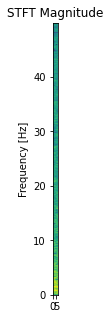

In [86]:
plt.figure(figsize=(sub_X.shape[0] / 100 ,5))
plt.pcolormesh(t[:sub_X.shape[0]], f[:500], np.log(np.transpose(sub_X)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time')
plt.show()

TypeError: Dimensions of C (500, 9) are incompatible with X (51) and/or Y (50); see help(pcolormesh)

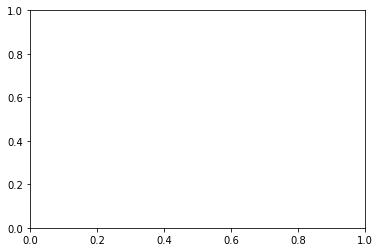

In [87]:
plt.pcolormesh(t[:223], f[:50], (np.transpose(sub_X)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

In [ ]:
# from here - hierarchical-clustering
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [65]:
data = X_t

In [66]:
import scipy.cluster.hierarchy as shc

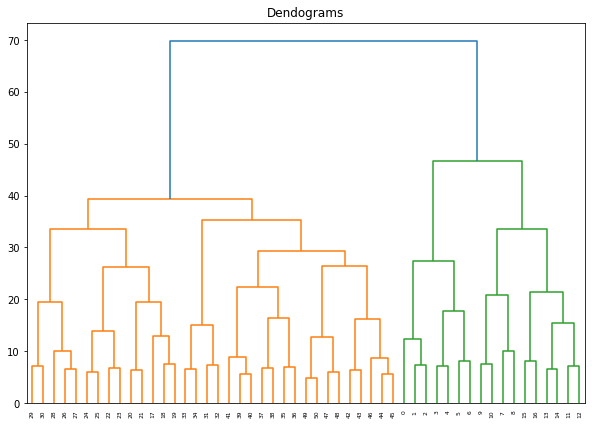

In [63]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [88]:
from sklearn.cluster import AgglomerativeClustering


In [89]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster1 = cluster.fit_predict(data)

In [90]:
cluster1

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
indxes = np.where(cluster1 == 0)

In [94]:
sub_data = X_t[indxes[0],:] #indices from cluster 0

In [95]:
sub_data.shape

(34, 500)

In [96]:
sub_data

array([[0.73015418, 1.87208501, 1.83442859, ..., 0.78867116, 0.38791904,
        0.38076107],
       [1.36797875, 2.20864707, 2.3706409 , ..., 0.75273227, 0.22071908,
        0.20401442],
       [1.54583538, 2.29150931, 2.72846181, ..., 0.62886123, 0.32379799,
        0.0316273 ],
       ...,
       [0.70814222, 1.37000225, 3.20072873, ..., 0.25049624, 0.46380686,
        0.09111158],
       [0.96303479, 1.43315987, 3.34905922, ..., 0.33654712, 0.40662408,
        0.34062648],
       [0.82846836, 1.38757793, 2.79844428, ..., 0.31011778, 0.33367997,
        0.44481095]])

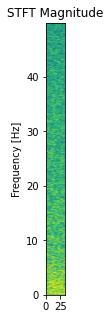

In [97]:
plt.figure(figsize=(sub_data.shape[0] / 100 ,5))
plt.pcolormesh(t[:sub_data.shape[0]], f[:500], np.log(np.transpose(sub_data)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time')
plt.show()

In [98]:
indxes = np.where(cluster1 == 1)

In [102]:
sub_data = X_t[indxes[0],:] #indices from cluster 1

In [103]:
sub_data.shape

(10, 500)

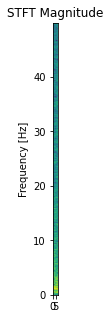

In [104]:
plt.figure(figsize=(sub_data.shape[0] / 100 ,5))
plt.pcolormesh(t[:sub_data.shape[0]], f[:500], np.log(np.transpose(sub_data)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time')
plt.show()

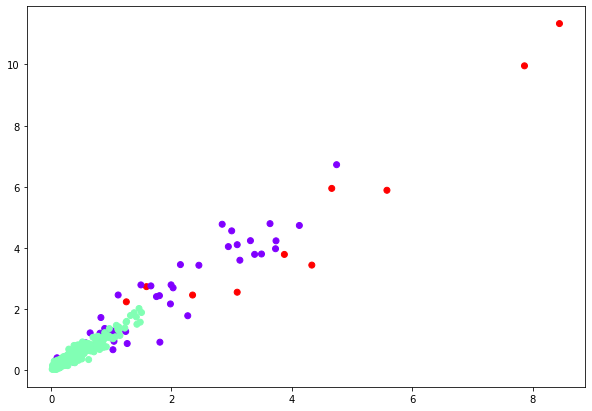

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')